# Association Rules

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
# pip install mlxtend matplotlib
# pip install tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

# Q1). BOOK.CSV

In [3]:
book=pd.read_csv(r"book.csv")
book
# Convert the transaction data to one-hot encoded format
# onehot = df[column_name].str.join('|').str.get_dummies()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Rating Visualization 

In [4]:
# Reverse the pivot table
reverse_pivot = book.unstack().reset_index(name='Value')
reverse_pivot=reverse_pivot.drop(columns=['level_1'])
reverse_pivot=reverse_pivot.rename({'level_0':'Title','Value':'Rating'}, axis=1)
reverse_pivot = reverse_pivot[reverse_pivot['Rating'] != 0]
reverse_pivot

,Title,Rating
1,ChildBks,1
3,ChildBks,1
5,ChildBks,1
8,ChildBks,1
9,ChildBks,1
...,...,...
21954,Florence,1
21960,Florence,1
21969,Florence,1
21975,Florence,1


In [5]:
# Rating Count
rating=pd.DataFrame(reverse_pivot.groupby('Title')['Rating'].mean())
rating['num of rating']=pd.DataFrame(reverse_pivot.groupby('Title')['Rating'].count())
rating

,Rating,num of rating
Title,,
ArtBks,1.0,482
ChildBks,1.0,846
CookBks,1.0,862
DoItYBks,1.0,564
Florence,1.0,217
GeogBks,1.0,552
ItalArt,1.0,97
ItalAtlas,1.0,74
ItalCook,1.0,227


### Joint plot

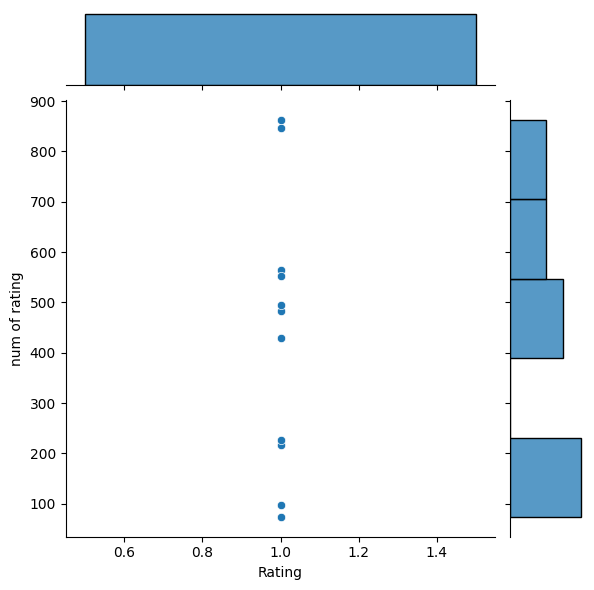

In [6]:
#Joint plot
sns.jointplot(x='Rating',y='num of rating',data=rating)
plt.show()

### distribution plots

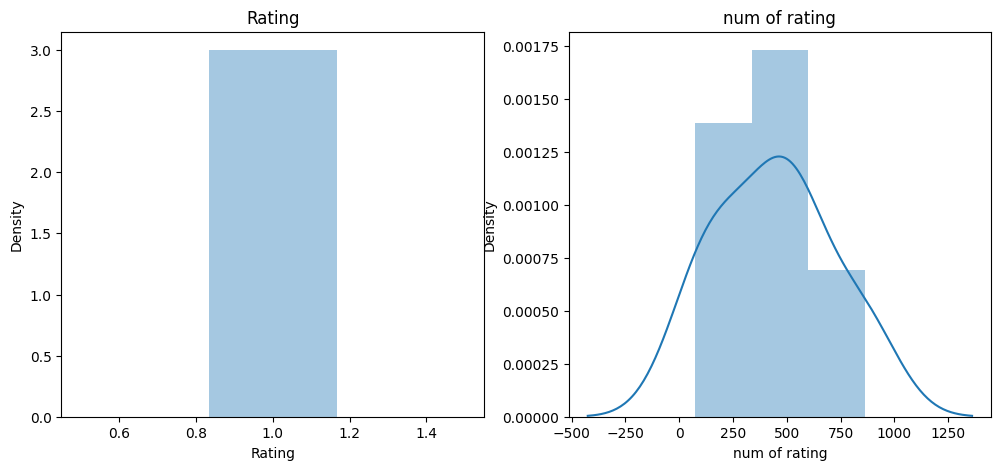

In [7]:
# distribution plots
new_data=rating
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    sns.distplot(new_data[column], kde=True, ax=ax)
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()

### Histogram & Probability Plot (Q-Q plot)

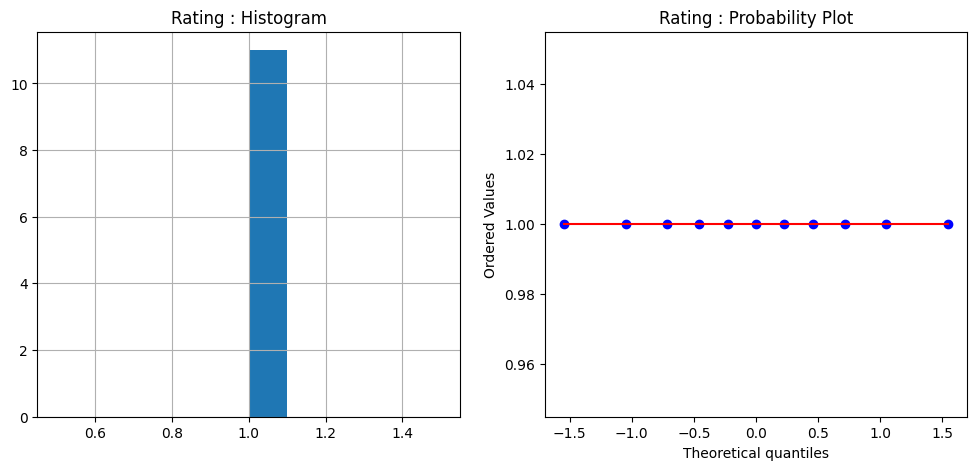

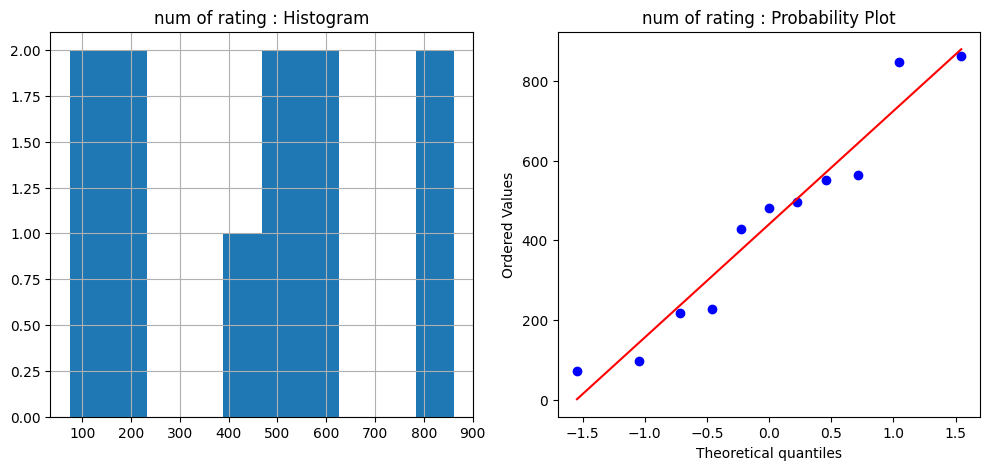

In [8]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'{feature} : Histogram')
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


### i). Association rules with 10% Support

In [9]:
data=book.astype(bool)
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets

(39, 2)


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


### ii). Association rules with 10% Support and 70% confidence

In [10]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules.shape)
rules

(19, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
7,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594


Some filter check

In [11]:
# minimum 2 items
print(rules[rules['antecedents'].apply(len) >= 2].shape)
rules[rules['antecedents'].apply(len) >= 2]

(15, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
7,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
10,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403,0.532948
11,"(ArtBks, CookBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235,0.530100
12,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571,0.543883
13,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081,0.563882


In [12]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
print(rules[rules.lift>1].shape)
rules[rules.lift>1]

(19, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
7,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594


In [13]:
# lift - ascending
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
16,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
17,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
15,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115
18,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
14,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831


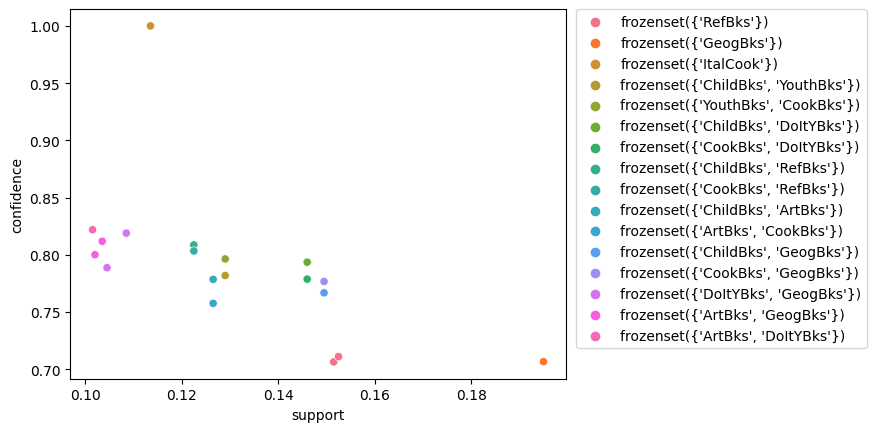

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## Create Functions to run multiple

In [15]:
# Function to run Apriori and generate rules
def generate_rules(min_support, min_confidence, min_length,df):   
    # Run Apriori algorithm
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)    # metric='lift', metric="confidence"
    print('size of rules:', rules.shape)
    
    # Filter rules based on minimum length
    rules_filtr = rules[rules['antecedents'].apply(len) >= min_length]
    print('size of rules_filtr:',rules_filtr.shape)
    
    return rules, rules_filtr

# Experimenting with Data


 Rules for Support=5.00%, Confidence=60.00%:
size of rules: (135, 10)
size of rules_filtr: (63, 10)
Rules Filter Table:
+-------------------------------------------------+-------------------------+--------------------+--------------------+---------+--------------------+--------------------+----------------------+--------------------+--------------------+
|                   antecedents                   |       consequents       | antecedent support | consequent support | support |     confidence     |        lift        |       leverage       |     conviction     |   zhangs_metric    |
+-------------------------------------------------+-------------------------+--------------------+--------------------+---------+--------------------+--------------------+----------------------+--------------------+--------------------+
| frozenset({'ChildBks', 'YouthBks', 'DoItYBks'}) | frozenset({'CookBks'})  |       0.095        |       0.431        |  0.082  | 0.8631578947368421 | 2.002686530711930

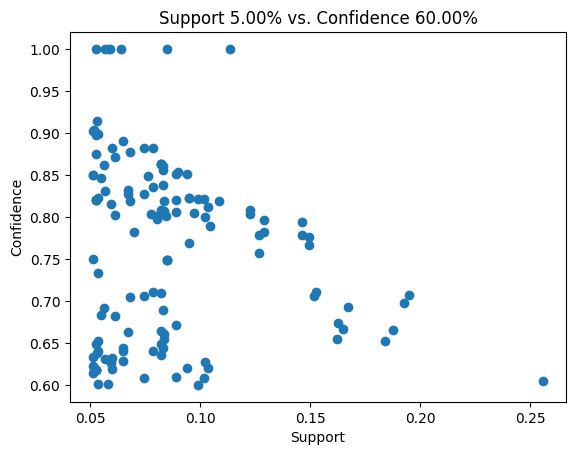

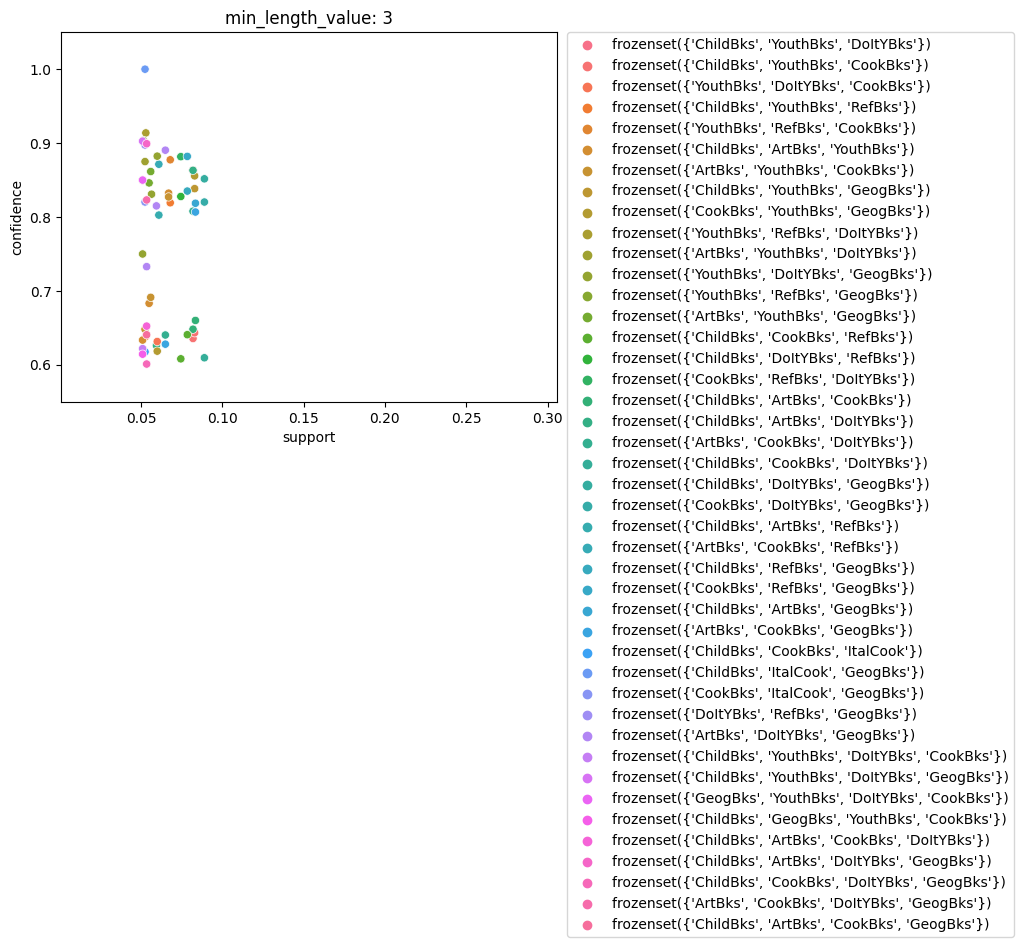


 Rules for Support=5.00%, Confidence=85.00%:
size of rules: (30, 10)
size of rules_filtr: (21, 10)
Rules Filter Table:
+-------------------------------------------------+-------------------------+--------------------+--------------------+---------+--------------------+--------------------+----------------------+--------------------+--------------------+
|                   antecedents                   |       consequents       | antecedent support | consequent support | support |     confidence     |        lift        |       leverage       |     conviction     |   zhangs_metric    |
+-------------------------------------------------+-------------------------+--------------------+--------------------+---------+--------------------+--------------------+----------------------+--------------------+--------------------+
| frozenset({'ChildBks', 'YouthBks', 'DoItYBks'}) | frozenset({'CookBks'})  |       0.095        |       0.431        |  0.082  | 0.8631578947368421 | 2.0026865307119306

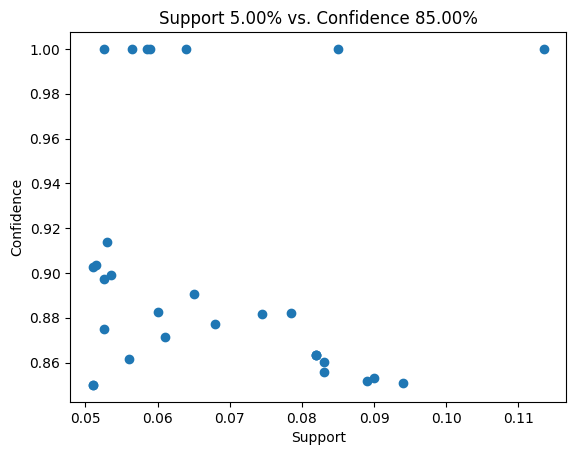

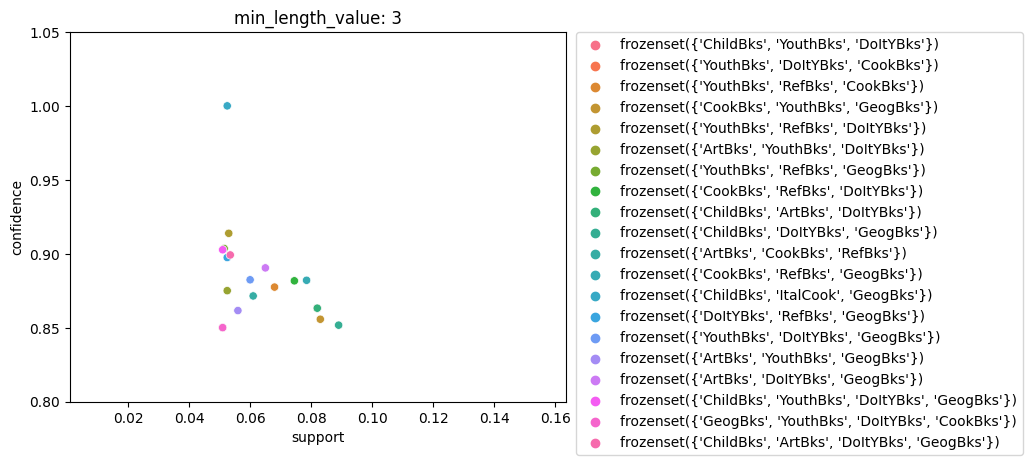


 Rules for Support=5.00%, Confidence=90.00%:
size of rules: (10, 10)
size of rules_filtr: (4, 10)
Rules Filter Table:
+------------------------------------------------------------+-------------------------+--------------------+--------------------+---------+--------------------+-------------------+----------------------+-------------------+--------------------+
|                        antecedents                         |       consequents       | antecedent support | consequent support | support |     confidence     |       lift        |       leverage       |    conviction     |   zhangs_metric    |
+------------------------------------------------------------+-------------------------+--------------------+--------------------+---------+--------------------+-------------------+----------------------+-------------------+--------------------+
|       frozenset({'YouthBks', 'RefBks', 'DoItYBks'})        | frozenset({'ChildBks'}) |       0.058        |       0.423        |  0.053  | 0.

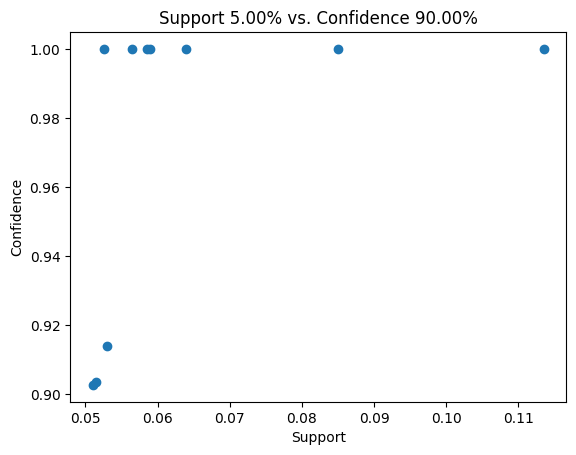

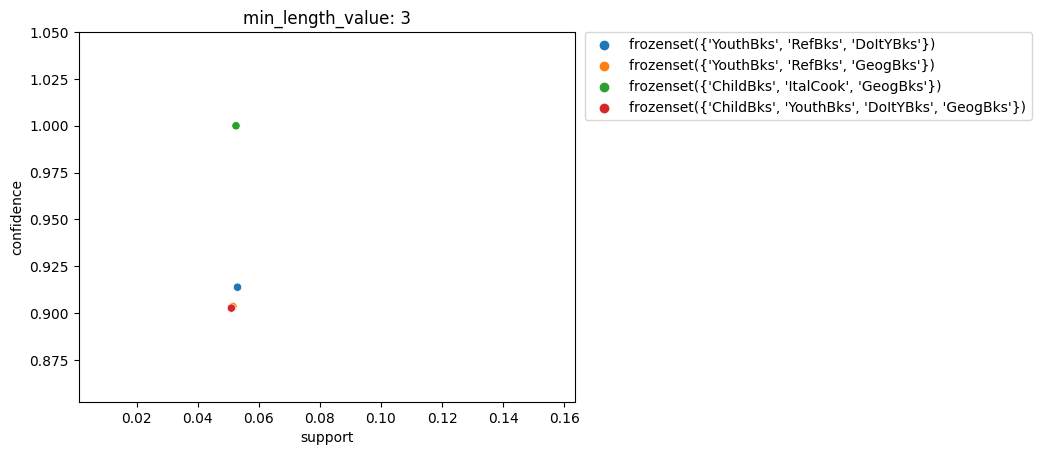


 Rules for Support=5.00%, Confidence=100.00%:
size of rules: (7, 10)
size of rules_filtr: (1, 10)
Rules Filter Table:
+------------------------------------------------+------------------------+--------------------+--------------------+---------+------------+-------------------+-----------+------------+--------------------+
|                  antecedents                   |      consequents       | antecedent support | consequent support | support | confidence |       lift        | leverage  | conviction |   zhangs_metric    |
+------------------------------------------------+------------------------+--------------------+--------------------+---------+------------+-------------------+-----------+------------+--------------------+
| frozenset({'ChildBks', 'ItalCook', 'GeogBks'}) | frozenset({'CookBks'}) |       0.0525       |       0.431        | 0.0525  |    1.0     | 2.320185614849188 | 0.0298725 |    inf     | 0.6005277044854882 |
+------------------------------------------------+---

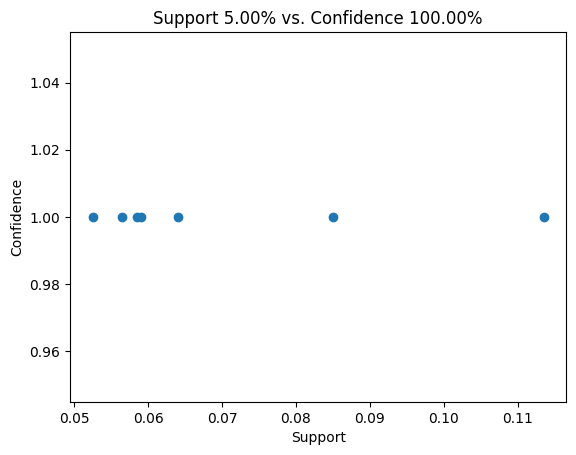

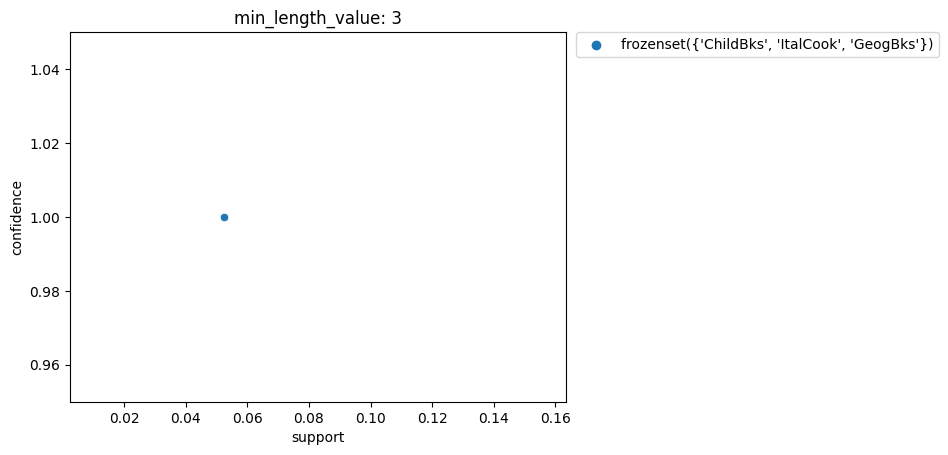


 Rules for Support=10.00%, Confidence=60.00%:
size of rules: (30, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


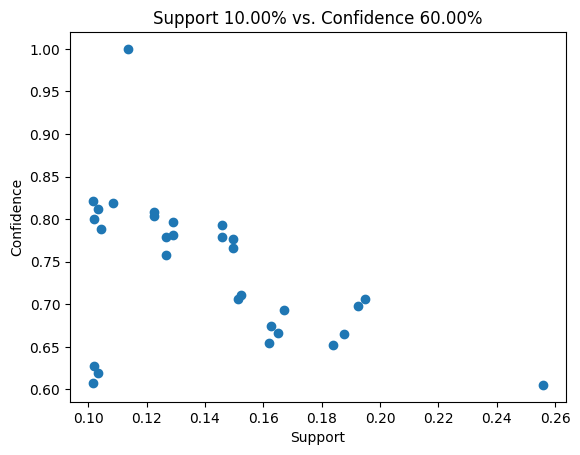

there is no value with (min_length_value= 3)



 Rules for Support=10.00%, Confidence=85.00%:
size of rules: (1, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


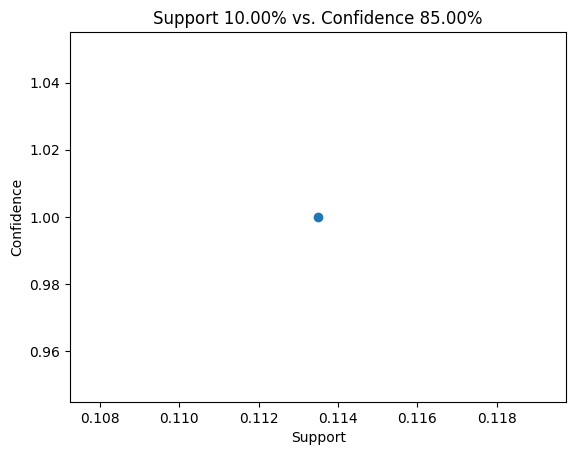

there is no value with (min_length_value= 3)



 Rules for Support=10.00%, Confidence=90.00%:
size of rules: (1, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


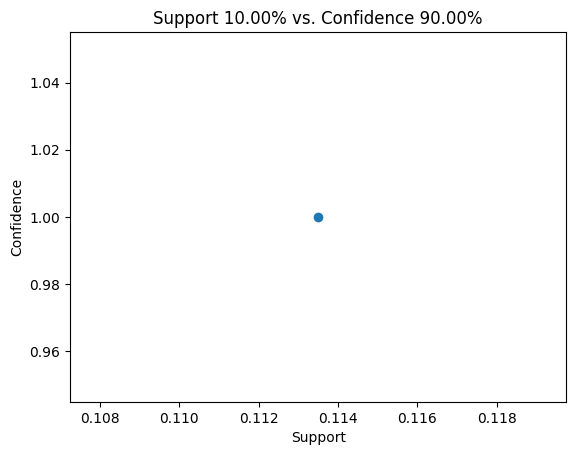

there is no value with (min_length_value= 3)



 Rules for Support=10.00%, Confidence=100.00%:
size of rules: (1, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


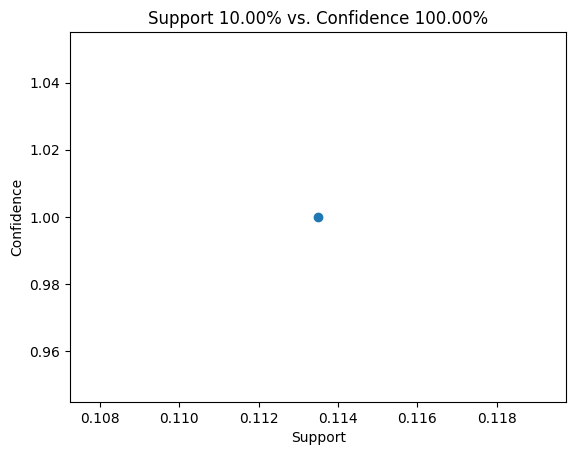

there is no value with (min_length_value= 3)



 Rules for Support=15.00%, Confidence=60.00%:
size of rules: (11, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


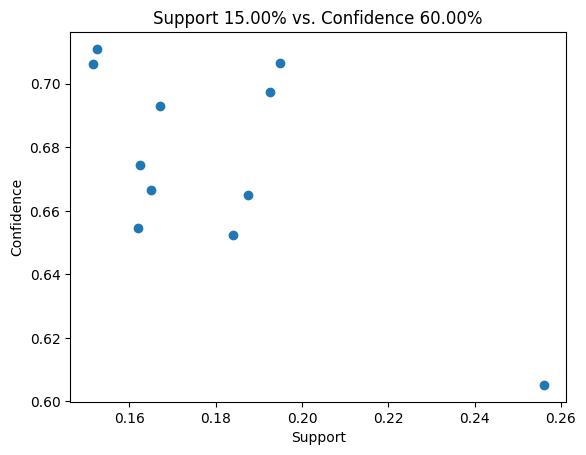

there is no value with (min_length_value= 3)



 Rules for Support=15.00%, Confidence=85.00%:
size of rules: (0, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
there is no value with (min_length_value: 3)
there is no value with (min_length_value= 3)



 Rules for Support=15.00%, Confidence=90.00%:
size of rules: (0, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+-----

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [16]:
# Experimenting with different parameters
min_support_values = [0.05, 0.1, 0.15]
min_confidence_values = [0.6, 0.85, 0.9, 1]
min_length_value = 3  # Minimum length for rules
data=book.astype(bool)

for min_support in min_support_values:
    for min_confidence in min_confidence_values:
        
        # print(f"Rules for Support={min_support*100:.2f}%, Confidence={min_confidence*100:.2f}%:")
        print(f"\n \033[1;34mRules for Support={min_support*100:.2f}%, Confidence={min_confidence*100:.2f}%:\033[0m")
        # Generate rules
        rules, rules_filtr = generate_rules(min_support, min_confidence, min_length_value,data)
                # Display rules
        from tabulate import tabulate
        print('Rules Filter Table:')
        print(tabulate(rules_filtr.head(10), headers='keys', tablefmt='pretty', showindex=False))
        
        if len(rules) != 0:
            # Scatter plot of support vs. confidence 
            plt.scatter(rules['support'],rules['confidence'])
            plt.xlabel('Support')
            plt.ylabel('Confidence')
            plt.title(f'Support {min_support*100:.2f}% vs. Confidence {min_confidence*100:.2f}%')
            plt.show()
        else:
            print(f'there is no value with (min_length_value: {min_length_value})')
            
        # second plot
        if len(rules_filtr) != 0:
            sns.scatterplot(x='support', y='confidence', data=rules_filtr, hue='antecedents')
            plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            # Set the axis limits to match the first plot
            plt.xlim(rules['support'].min()-0.05, rules['support'].max()+0.05)
            plt.ylim(rules['confidence'].min()-0.05, rules['confidence'].max()+0.05)
            plt.title(f'min_length_value: {min_length_value}')
            plt.show()
        else:
            print(f'there is no value with (min_length_value= {min_length_value})\n\n')
            
print(f"Rules for Support={min_support*100:.2f}%, Confidence={min_confidence*100:.2f}%:")
rules

# Q2). my_movies.CSV

In [17]:
movie=pd.read_csv(r"my_movies.csv")
print(movie.shape)
movie

(10, 15)


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [18]:
movie_new=movie.iloc[:,5:]
print(movie_new.shape)
movie_new

(10, 10)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Rating Visualization 

In [19]:
# Reverse the pivot table
reverse_pivot = movie_new.unstack().reset_index(name='Value')
reverse_pivot=reverse_pivot.drop(columns=['level_1'])
reverse_pivot=reverse_pivot.rename({'level_0':'Title','Value':'Rating'}, axis=1)
reverse_pivot = reverse_pivot[reverse_pivot['Rating'] != 0]
reverse_pivot

,Title,Rating
0,Sixth Sense,1
3,Sixth Sense,1
4,Sixth Sense,1
5,Sixth Sense,1
8,Sixth Sense,1
9,Sixth Sense,1
11,Gladiator,1
13,Gladiator,1
14,Gladiator,1
15,Gladiator,1


In [20]:
# Rating Count
rating=pd.DataFrame(reverse_pivot.groupby('Title')['Rating'].mean())
rating['num of rating']=pd.DataFrame(reverse_pivot.groupby('Title')['Rating'].count())
rating

,Rating,num of rating
Title,,
Braveheart,1.0,1
Gladiator,1.0,7
Green Mile,1.0,2
Harry Potter1,1.0,2
Harry Potter2,1.0,1
LOTR,1.0,1
LOTR1,1.0,2
LOTR2,1.0,2
Patriot,1.0,6


### Joint plot

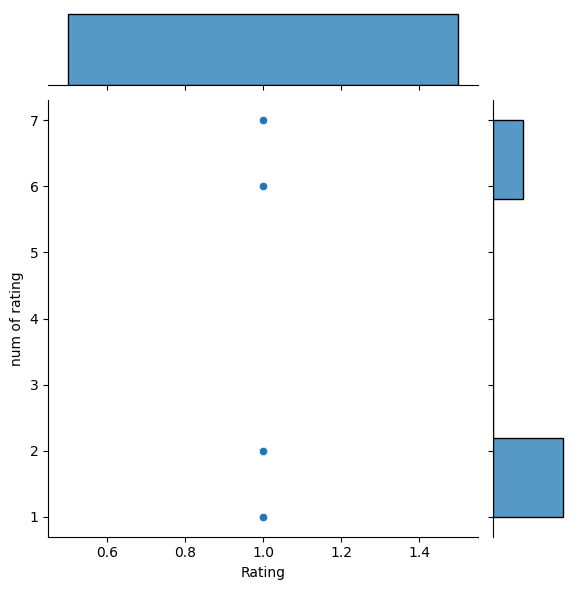

In [21]:
#Joint plot
sns.jointplot(x='Rating',y='num of rating',data=rating)
plt.show()

### distribution plots

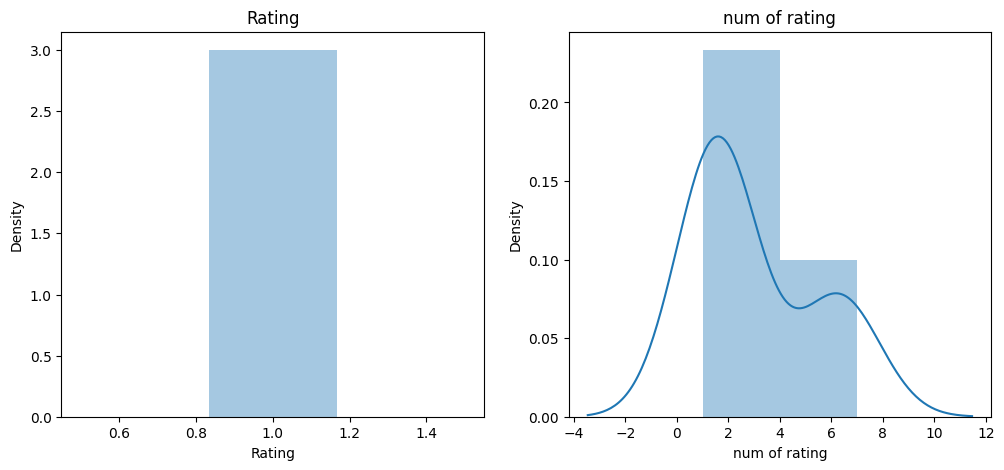

In [22]:
# distribution plots
new_data=rating
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    sns.distplot(new_data[column], kde=True, ax=ax)
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()

### Histogram & Probability Plot (Q-Q plot)

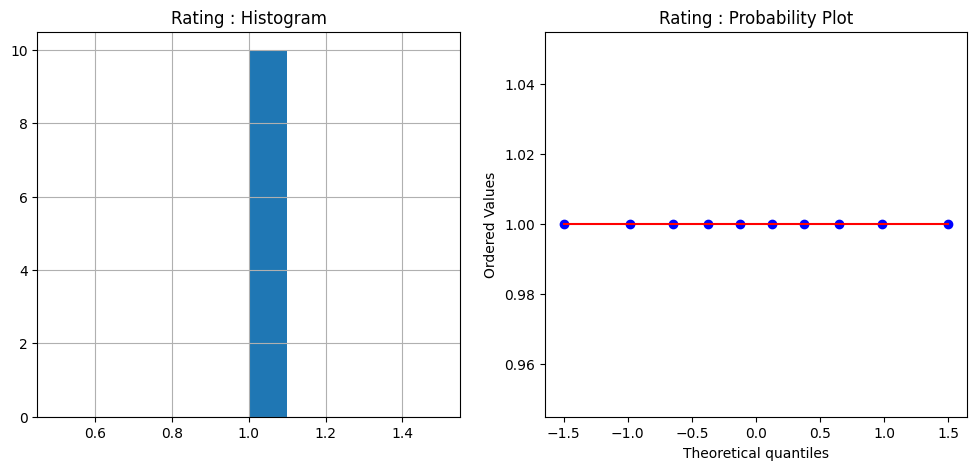

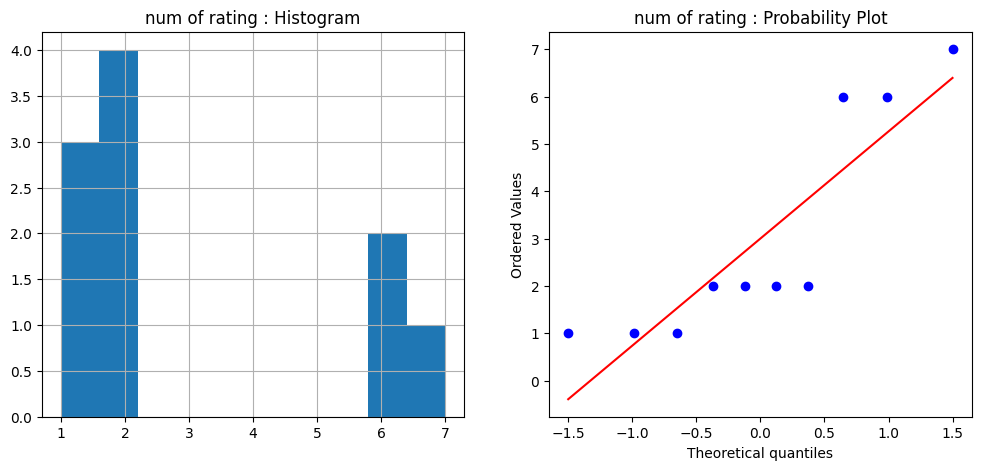

In [23]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'{feature} : Histogram')
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Experimenting with Data


 Rules for Support=5.00%, Confidence=60.00%:
size of rules: (134, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |         

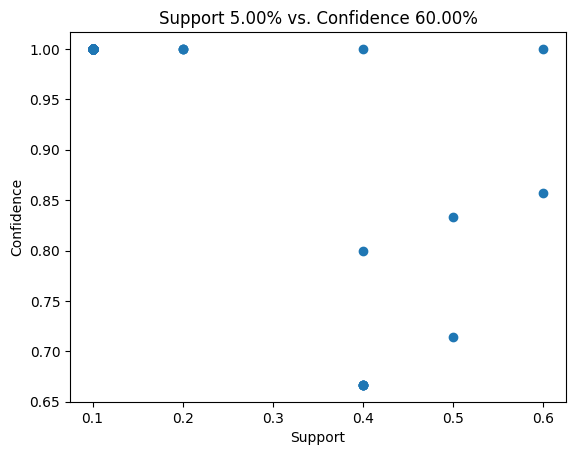

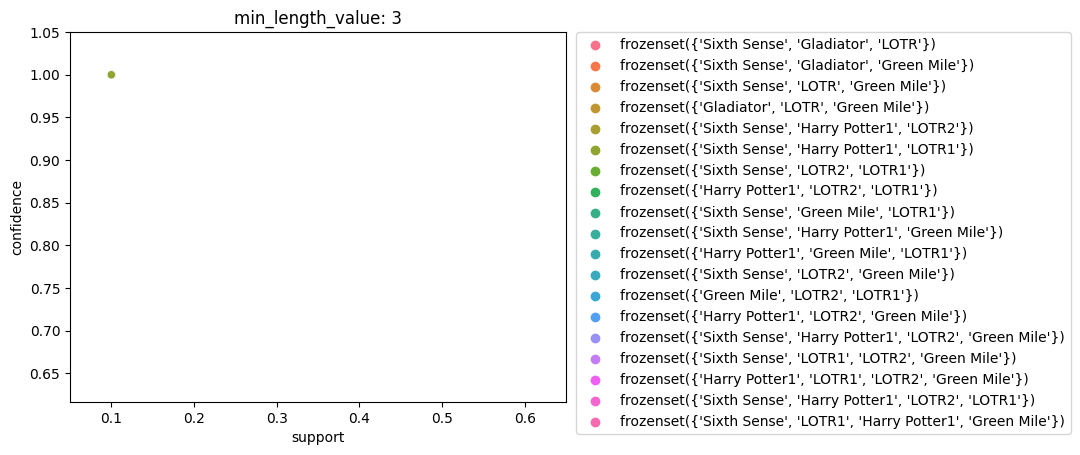


 Rules for Support=5.00%, Confidence=75.00%:
size of rules: (128, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |         

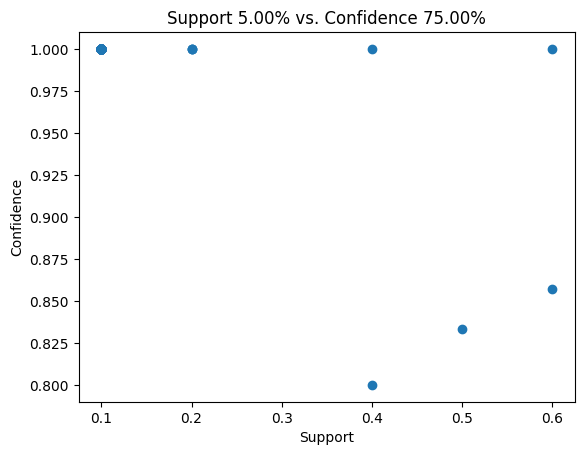

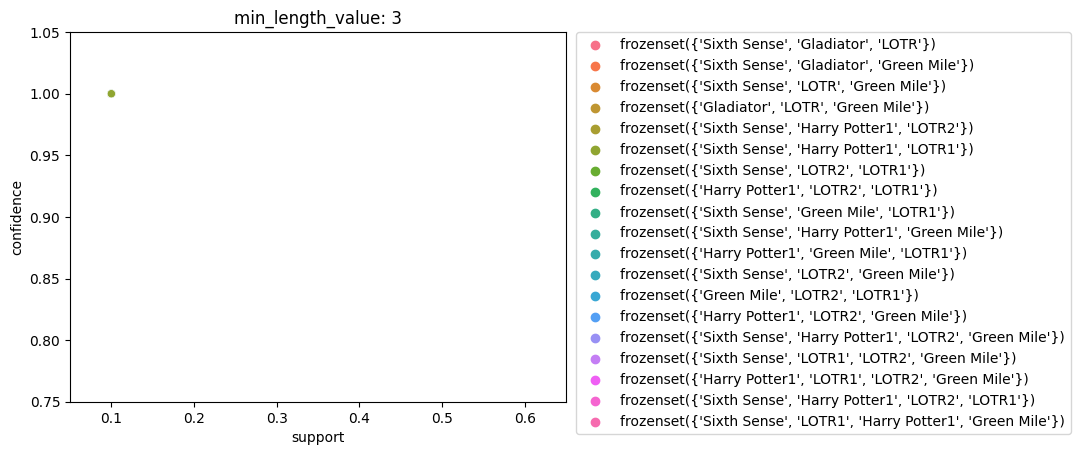


 Rules for Support=5.00%, Confidence=90.00%:
size of rules: (125, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |         

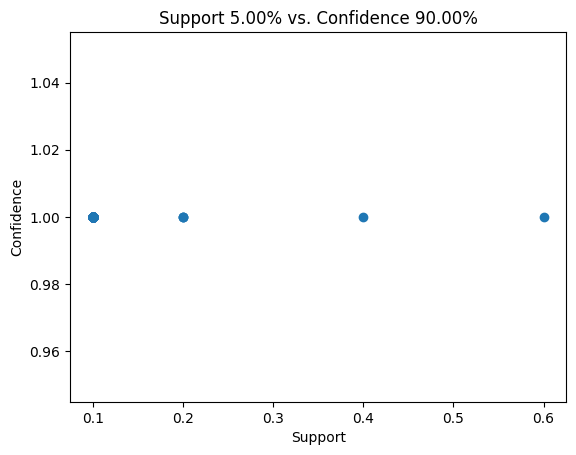

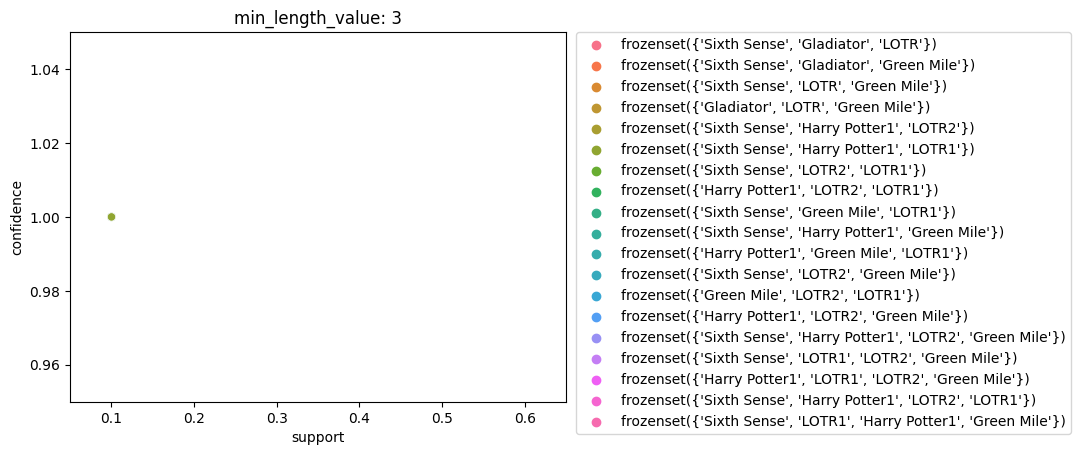


 Rules for Support=5.00%, Confidence=100.00%:
size of rules: (125, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |        

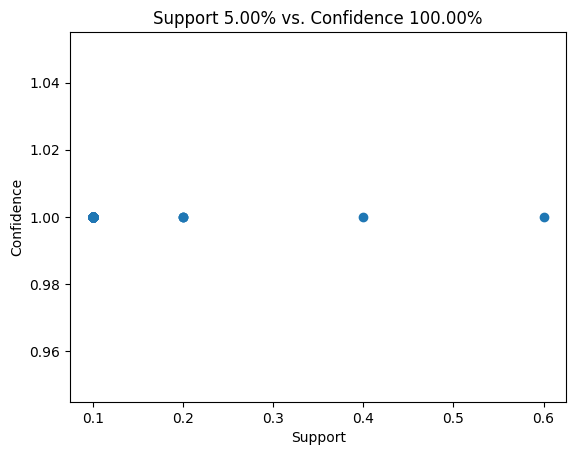

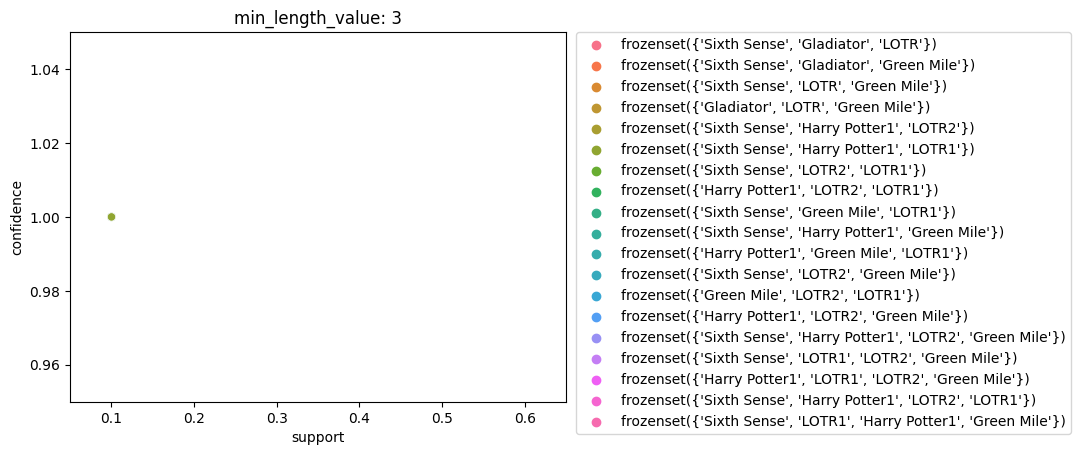


 Rules for Support=10.00%, Confidence=60.00%:
size of rules: (134, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |        

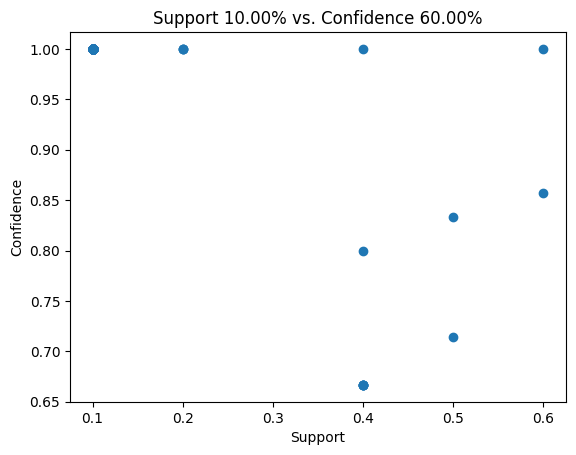

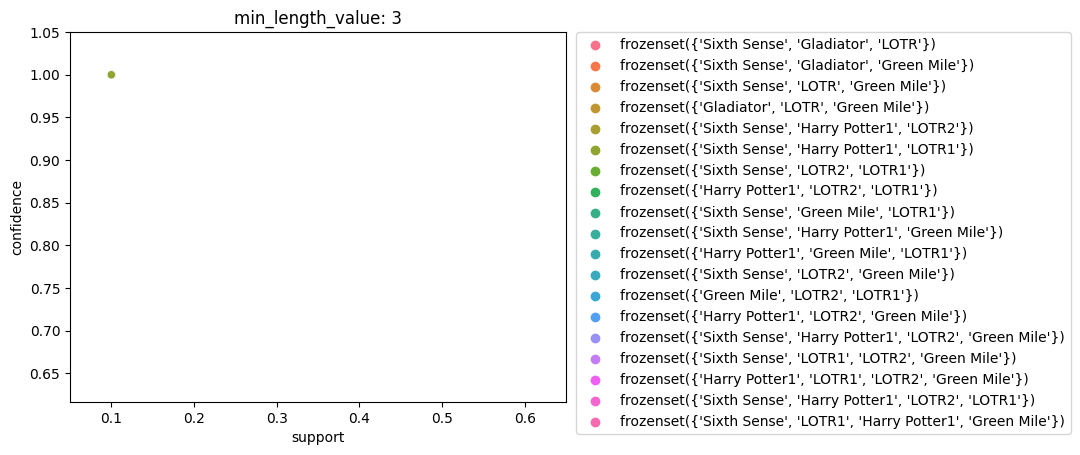


 Rules for Support=10.00%, Confidence=75.00%:
size of rules: (128, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |        

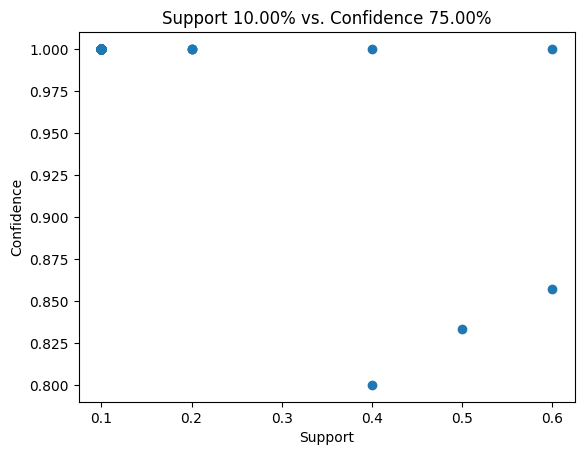

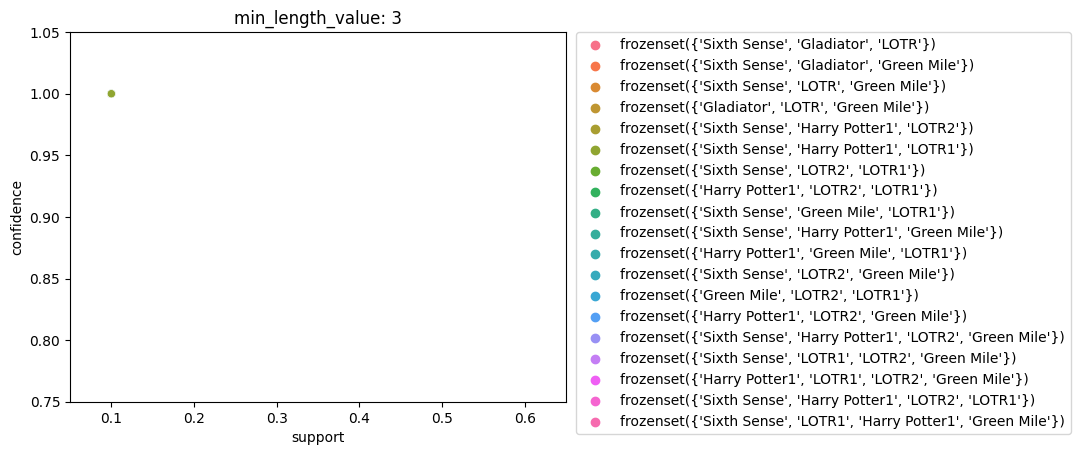


 Rules for Support=10.00%, Confidence=90.00%:
size of rules: (125, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |        

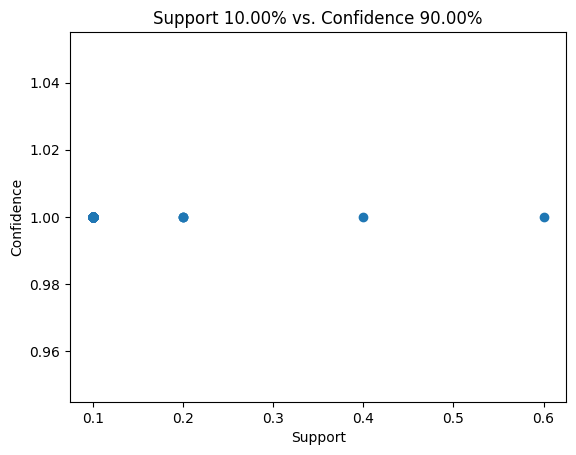

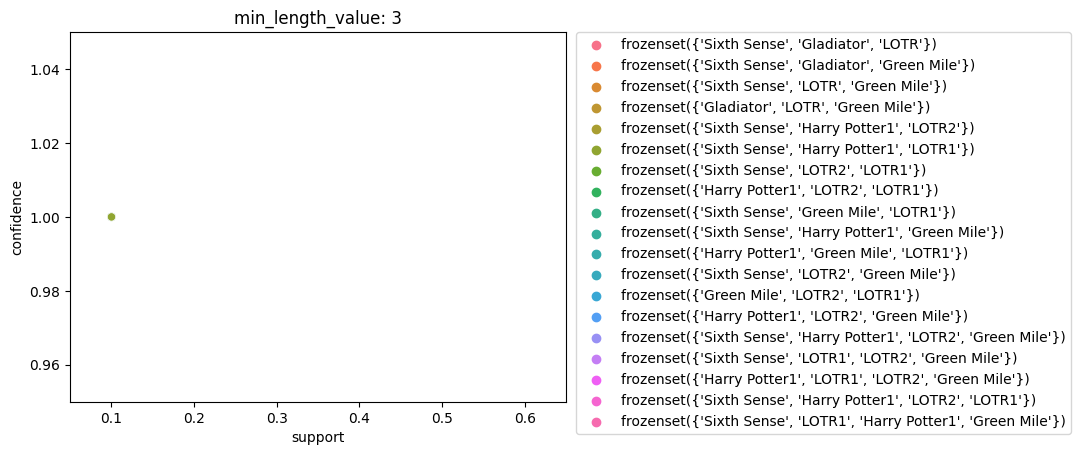


 Rules for Support=10.00%, Confidence=100.00%:
size of rules: (125, 10)
size of rules_filtr: (39, 10)
Rules Filter Table:
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|                      antecedents                      |         consequents          | antecedent support | consequent support | support | confidence |        lift        |       leverage       | conviction |   zhangs_metric    |
+-------------------------------------------------------+------------------------------+--------------------+--------------------+---------+------------+--------------------+----------------------+------------+--------------------+
|    frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})    |  frozenset({'Green Mile'})   |        0.1         |        0.2         |   0.1   |    1.0     |        5.0         |       

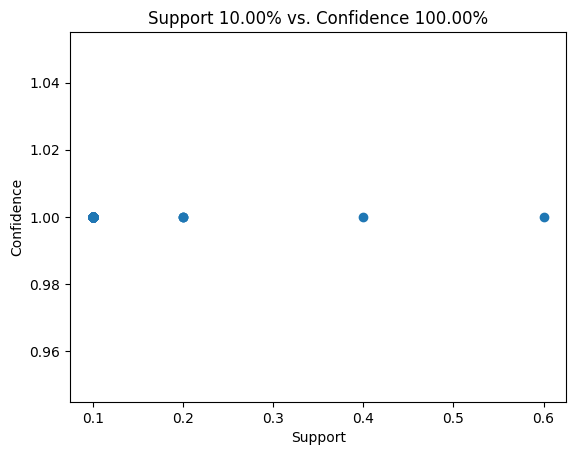

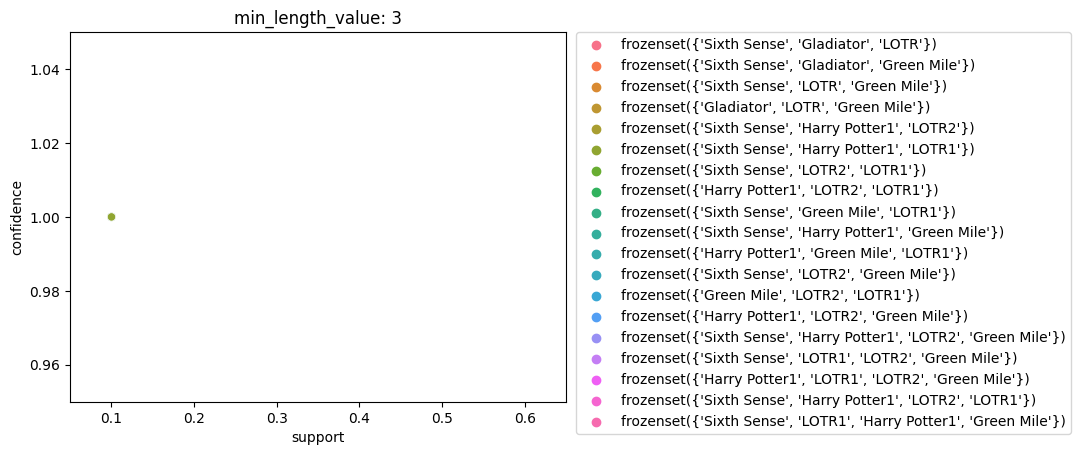


 Rules for Support=15.00%, Confidence=60.00%:
size of rules: (14, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


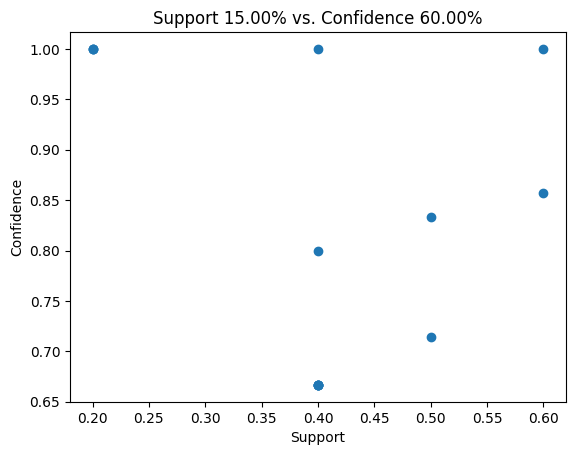

there is no value with (min_length_value= 3)



 Rules for Support=15.00%, Confidence=75.00%:
size of rules: (8, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


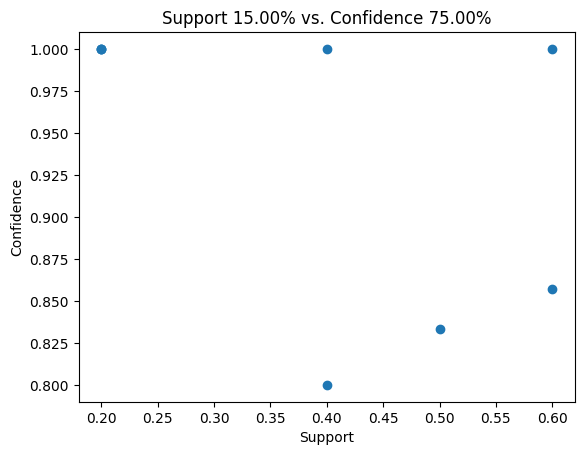

there is no value with (min_length_value= 3)



 Rules for Support=15.00%, Confidence=90.00%:
size of rules: (5, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


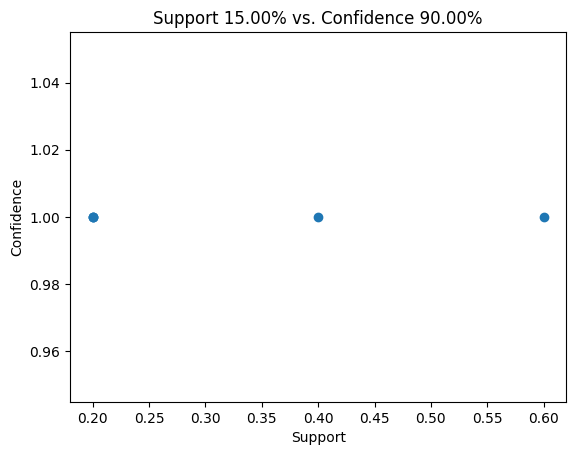

there is no value with (min_length_value= 3)



 Rules for Support=15.00%, Confidence=100.00%:
size of rules: (5, 10)
size of rules_filtr: (0, 10)
Rules Filter Table:
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric |
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+
+-------------+-------------+--------------------+--------------------+---------+------------+------+----------+------------+---------------+


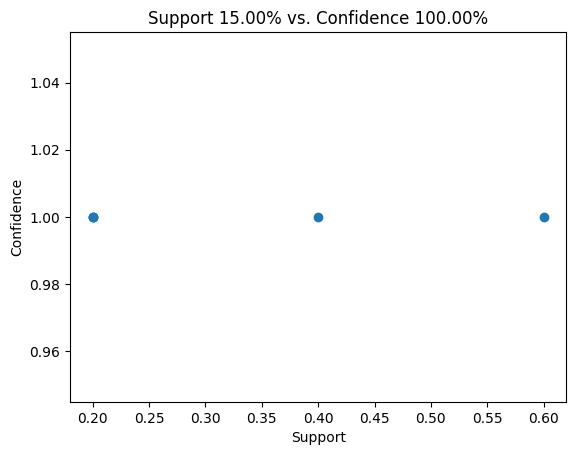

there is no value with (min_length_value= 3)


Rules for Support=15.00%, Confidence=100.00%:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.50
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.75
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.00
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.00
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,0.50


In [24]:
# Experimenting with different parameters
min_support_values = [0.05, 0.1, 0.15]
min_confidence_values = [0.6, 0.75, 0.9, 1]
min_length_value = 3  # Minimum length for rules
data=movie_new.astype(bool)

for min_support in min_support_values:
    for min_confidence in min_confidence_values:
        # print(f"Rules for Support={min_support*100:.2f}%, Confidence={min_confidence*100:.2f}%:")
        print(f"\n \033[1;34mRules for Support={min_support*100:.2f}%, Confidence={min_confidence*100:.2f}%:\033[0m")
        # Generate rules
        rules, rules_filtr = generate_rules(min_support, min_confidence, min_length_value,data)
                # Display rules
        from tabulate import tabulate
        print('Rules Filter Table:')
        print(tabulate(rules_filtr.head(10), headers='keys', tablefmt='pretty', showindex=False))
        
        if len(rules) != 0:
            # Scatter plot of support vs. confidence 
            plt.scatter(rules['support'],rules['confidence'])
            plt.xlabel('Support')
            plt.ylabel('Confidence')
            plt.title(f'Support {min_support*100:.2f}% vs. Confidence {min_confidence*100:.2f}%')
            plt.show()
        else:
            print(f'there is no value with (min_length_value: {min_length_value})')
            
        # second plot
        if len(rules_filtr) != 0:
            sns.scatterplot(x='support', y='confidence', data=rules_filtr, hue='antecedents')
            plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            # Set the axis limits to match the first plot
            plt.xlim(rules['support'].min()-0.05, rules['support'].max()+0.05)
            plt.ylim(rules['confidence'].min()-0.05, rules['confidence'].max()+0.05)
            plt.title(f'min_length_value: {min_length_value}')
            plt.show()
        else:
            print(f'there is no value with (min_length_value= {min_length_value})\n\n')
            
print(f"Rules for Support={min_support*100:.2f}%, Confidence={min_confidence*100:.2f}%:")
rules